<a href="https://colab.research.google.com/github/Mateus0808/-covid19_data_visualization/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install matplotlib==3.1.0

#1.0 Import libraries and dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#2.0 Reading the dataset


In [ ]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
data = pd.read_csv(link)
data.head()

# 3.0 Pre-processing and Cleaning

---



In [ ]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country", "state", "city", "date", "retail", "grocery", "parks", "transit", "workplace", "residential"]
data_br.date = pd.to_datetime(data_br.date)
data_br.index=data_br.date
data_br.drop(labels="date", axis=1, inplace=True)
data_br

In [51]:
plt.style.use("fivethirtyeight")

In [52]:
data_br.state=data_br.state.str.replace("State of ","")

In [ ]:
data_br_state = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()
data_br_state.head()

In [54]:
data_unstacking = data_br_state.groupby(by=[data_br_state.index, "state"]).mean().unstack()

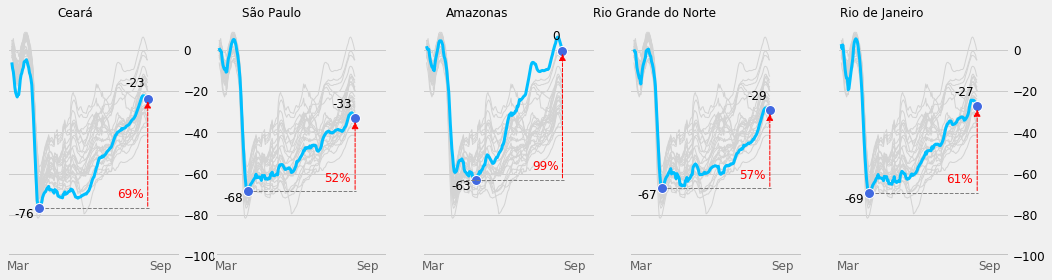

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16,4))

item = "retail" #retail, #grocery, parks, transit, workplace, residential
states = ["Ceará", "São Paulo", "Amazonas", "Rio Grande do Norte", "Rio de Janeiro"]

for i,state in enumerate(states):

  data_unstacking[item].rolling(window=7).mean().plot(legend=False, color="#D3D3D3", linewidth=1, alpha=1, ax=ax[i])
  data_unstacking[item][state].rolling(window=7).mean().plot(legend=False, color="#00BFFF", linewidth=3, alpha=1, ax=ax[i]) 
  
  min = data_unstacking[item][state].rolling(window=7).mean().min()
  minFormat = int(min)
  minDate = data_unstacking[item][state].rolling(window=7).mean().idxmin()

  maxDate  = data_unstacking[item][state].loc[~data_unstacking[item][state].isnull()].rolling(window=7).mean().index.max()
  stateValue = data_unstacking[item][state].loc[~data_unstacking[item][state].isnull()].rolling(window=7).mean().tail(1).values[0]
  intStateValue = int(stateValue)

  statePercentage =  abs((float(stateValue)-float(min))/float(min) * 100.0)
  statePercentage = "{:.0f}%".format(statePercentage)

  ax[i].plot([minDate, maxDate], [min, stateValue], 'o', markerfacecolor='#4169E1', markersize=10, markeredgecolor="white")

  ax[i].annotate(minFormat, xy=(minDate, min), xycoords="data", ha="right",  xytext=(-5, -10), textcoords='offset points', size=12)

  ax[i].annotate("", xy=(maxDate, intStateValue-1), xycoords='data', xytext=(maxDate, min), textcoords='data',
            arrowprops=dict(arrowstyle="-|>", linestyle="--", linewidth=1, color="red"))


  ax[i].annotate(intStateValue, xy=(maxDate, intStateValue), xycoords="data", ha="right", xytext=(-3, 10), textcoords='offset points', size=12)

  ax[i].annotate(statePercentage, xy=(maxDate, min), xycoords="data", ha="right", xytext=(-4, 10), textcoords='offset points', size=12, color="red")

  ax[i].set_ylim(-100)
  ax[i].axhline(min, xmin=0.22, xmax=0.82, linestyle="--", linewidth=1, color="grey")
  ax[i].axhline(y=-99.1, linewidth=1, color="grey", alpha=0.4)

  ax[i].set_title(state, fontsize=12, ha='right')

  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")

  ax[i].set_xticklabels(["", "Mar", None, None, None, None, None, "Sep"], alpha= 0.6)
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)
  
  if (i==0) or (i==4):
    ax[i].yaxis.tick_right()
    # ax[i].
  else:
    ax[i].set_yticklabels([])


plt.savefig("states", dpi=300)
plt.show()
